# ANN

In [2]:
import datetime
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_test = y_test.reshape(-1,)

[6]


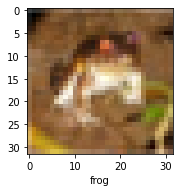

In [17]:
print(y_train[0])
plt.figure(figsize=(22,22))
plt.subplot(432+288+1)
plt.xlabel(classes[6])
plt.imshow(X_train[0]);

In [33]:
X_train_scl = X_train / 255
X_test_scl = X_test / 255
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(200,activation= 'relu'),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(10,activation= 'sigmoid')
])

# log_dir = "logs/fit/60epocs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 635,710
Trainable params: 635,710
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train_scl, y_train_cat, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0080 - accuracy: 0.2702
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7284 - accuracy: 0.3845
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6393 - accuracy: 0.4192
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5863 - accuracy: 0.4364
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5307 - accuracy: 0.4560
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4984 - accuracy: 0.4689
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4627 - accuracy: 0.4829
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4325 - accuracy: 0.4918
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4011 - accuracy: 0.5075
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.395

In [51]:
model.evaluate(X_test_scl, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 1.4799 - accuracy: 0.4795


[1.479865312576294, 0.4794999957084656]

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.13      0.99      0.22      1000
           1       0.16      0.10      0.13      1000
           2       0.20      0.12      0.15      1000
           3       0.23      0.20      0.22      1000
           4       0.20      0.00      0.00      1000
           5       0.17      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.11      0.14      0.07     10000
weighted avg       0.11      0.14      0.07     10000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [70]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [71]:
cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0348 - accuracy: 0.3248
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3405 - accuracy: 0.5219
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1562 - accuracy: 0.5977
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0350 - accuracy: 0.6389
Epoch 5/10
1345/1563 [========================>.....] - ETA: 1s - loss: 0.9527 - accuracy: 0.6659

In [ ]:
cnn.evaluate(X_test,y_test)

In [67]:
y_pred = cnn.predict(X_test)

In [68]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [69]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
# y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.86      0.72      0.79      1000
           2       0.61      0.49      0.55      1000
           3       0.43      0.48      0.45      1000
           4       0.56      0.67      0.61      1000
           5       0.67      0.41      0.51      1000
           6       0.67      0.78      0.72      1000
           7       0.78      0.62      0.69      1000
           8       0.69      0.83      0.76      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000

